### 前言
       我们接着《从零开始学Python【15】—matplotlib(散点图)》一文，继续分享matplotlib的数据可视化知识。在这一期我们将跟大家分享一下如何借用Python绘制雷达图（或蛛网图），雷达图可以很好刻画出某些指标的横向或纵向的对比关系，例如近三年营业额、客单价、新客招募等指标的同比情况对比，完全就可以通过雷达图让数据一目了然。很不幸的是，matplotlib模块中并没有特制雷达图的封装函数，我们只能换一只思路来实现了。

### 雷达图的绘制

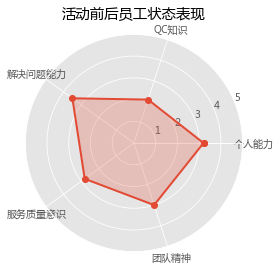

In [1]:
# 导入第三方模块
import numpy as np
import matplotlib.pyplot as plt

# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

# 使用ggplot的绘图风格
plt.style.use('ggplot')

# 构造数据
values = [3.2,2.1,3.5,2.8,3]
feature = ['个人能力','QC知识','解决问题能力','服务质量意识','团队精神']

N = len(values)
# 设置雷达图的角度，用于平分切开一个圆面
angles=np.linspace(0, 2*np.pi, N, endpoint=False)

# 为了使雷达图一圈封闭起来，需要下面的步骤
values=np.concatenate((values,[values[0]]))
angles=np.concatenate((angles,[angles[0]]))

# 绘图
fig=plt.figure()
# 这里一定要设置为极坐标格式
ax = fig.add_subplot(111, polar=True)
# 绘制折线图
ax.plot(angles, values, 'o-', linewidth=2)
# 填充颜色
ax.fill(angles, values, alpha=0.25)
# 添加每个特征的标签
ax.set_thetagrids(angles * 180/np.pi, feature)
# 设置雷达图的范围
ax.set_ylim(0,5)
# 添加标题
plt.title('活动前后员工状态表现')
# 添加网格线
ax.grid(True)
# 显示图形
plt.show()


非常简单吧，一张雷达图就这么造出来了。其思想也非常简单，即先把常见的二维坐标变换成极坐标，然后在极坐标的基础上绘制折线图，如果需要填充颜色的话就是要fill方法。一般而言这样的雷达图没有什么意义，因为我们用雷达图通常是要实现多个对象的对比，所以，该如何绘制多条线的雷达图呢？可以参考下面的代码：

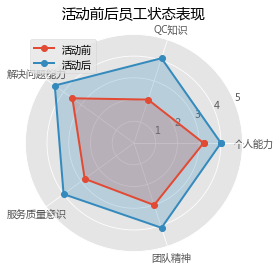

In [2]:
# 导入第三方模块
import numpy as np
import matplotlib.pyplot as plt

# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

# 使用ggplot的绘图风格
plt.style.use('ggplot')

# 构造数据
values = [3.2,2.1,3.5,2.8,3]
values2 = [4,4.1,4.5,4,4.1]
feature = ['个人能力','QC知识','解决问题能力','服务质量意识','团队精神']

N = len(values)
# 设置雷达图的角度，用于平分切开一个圆面
angles=np.linspace(0, 2*np.pi, N, endpoint=False)
# 为了使雷达图一圈封闭起来，需要下面的步骤
values=np.concatenate((values,[values[0]]))
values2=np.concatenate((values2,[values2[0]]))
angles=np.concatenate((angles,[angles[0]]))

# 绘图
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
# 绘制折线图
ax.plot(angles, values, 'o-', linewidth=2, label = '活动前')
# 填充颜色
ax.fill(angles, values, alpha=0.25)
# 绘制第二条折线图
ax.plot(angles, values2, 'o-', linewidth=2, label = '活动后')
ax.fill(angles, values2, alpha=0.25)

# 添加每个特征的标签
ax.set_thetagrids(angles * 180/np.pi, feature)
# 设置雷达图的范围
ax.set_ylim(0,5)
# 添加标题
plt.title('活动前后员工状态表现')

# 添加网格线
ax.grid(True)
# 设置图例
plt.legend(loc = 'best')
# 显示图形
plt.show()


发现了吧，如果要绘制多个对象的雷达图，只需多执行几个绘制折线图的语句即可。总体来说，这张图绘制的还算可以，但总是觉得有点拥挤，不自在。其实在matplotlib官网中，也提供了绘制雷达图的API，只不过代码量非常大，感兴趣的话，可以前去查看（http://matplotlib.org/gallery/api/radar_chart.html#sphx-glr-gallery-api-radar-chart-py）。

虽然matplotlib模块没有封装好的雷达图命令，但pygal模块则提供了更加简单的雷达图函数，我们也尝试着借助这个模块实现雷达图的绘制。

In [3]:
# 导入第三方模块
import pygal

# 调用Radar这个类，并设置雷达图的填充，及数据范围
radar_chart = pygal.Radar(fill = True, range=(0,5))
# 添加雷达图的标题
radar_chart.title = '活动前后员工状态表现'
# 添加雷达图各顶点的含义
radar_chart.x_labels = ['个人能力','QC知识','解决问题能力','服务质量意识','团队精神']

# 绘制两条雷达图区域
radar_chart.add('活动前', [3.2,2.1,3.5,2.8,3])
radar_chart.add('活动后', [4,4.1,4.5,4,4.1])

# 保存图像
radar_chart.render_to_file('radar_chart.svg')

### 结语
       OK，关于雷达图的绘制，我们就分享到这里，但需要注意的是，雷达图中的各个对象在不同指标上要保持同样的量纲。如果你有问题，欢迎在公众号的留言区域表达你的疑问。同时，也欢迎各位朋友继续转发与分享文中的内容，让跟多的人学习和操作。
       
       欢迎各位关注“**每天进步一点点2015**”公众号，跟小编一起学习数据科学方面的内容！！      